<a href="https://colab.research.google.com/github/sauravkumar19/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [77]:
import pandas as pd
import numpy as np

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
path = '/content/drive/MyDrive/Copy of Coronavirus Tweets.csv'

In [80]:
data = pd.read_csv(path, encoding='latin-1',parse_dates=[0], infer_datetime_format=True)

In [81]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  object
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [83]:
data.isnull().sum()/len(data)

UserName         0.000000
ScreenName       0.000000
Location         0.208713
TweetAt          0.000000
OriginalTweet    0.000000
Sentiment        0.000000
dtype: float64

In [84]:
data[data.duplicated()]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
null_value = data['Location'].value_counts().sort_values()

In [87]:
data.describe(include = 'all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157,41157.000000,32567,41157,41157,41157
unique,41157,NaN,12220,30,41157,5
top,3799,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,1,NaN,540,3448,1,11422
mean,NaN,69329.000000,NaN,NaN,NaN,NaN
std,NaN,11881.146851,NaN,NaN,NaN,NaN
min,NaN,48751.000000,NaN,NaN,NaN,NaN
25%,NaN,59040.000000,NaN,NaN,NaN,NaN
50%,NaN,69329.000000,NaN,NaN,NaN,NaN
75%,NaN,79618.000000,NaN,NaN,NaN,NaN


In [88]:
null_value.head(15)

Iganga, Uganda.                  1
Delhi                            1
Pakistan | ??                    1
1AU - SF??AZ                     1
Based in Newbury                 1
mainly by the sea                1
California, North of the Wall    1
Criminal Solicitor, Wiltshire    1
South West England               1
North Warwickshire               1
Roma, Italia                     1
Reality                          1
Suffolk, VA 23434                1
Wellington, Somerset             1
Near Philadelphia, PA            1
Name: Location, dtype: int64

In [89]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [90]:
data['Location']

0                              London
1                                  UK
2                           Vagabonds
3                                 NaN
4                                 NaN
                     ...             
41152    Wellington City, New Zealand
41153                             NaN
41154                             NaN
41155                             NaN
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object

In [91]:
data.dropna(axis =0,inplace = True)

In [92]:
import re
def remove_special(string):
  return re.sub("[^a-zA-Z0-9' ]", "", string)

In [93]:
b = "wouldn't"
remove_special(b)

"wouldn't"

In [94]:
data['Location'] = data['Location'].apply(remove_special)

In [95]:
data['Location']

0                             London
1                                 UK
2                          Vagabonds
5                 T 3631970882363649
6                   3592654178753267
                    ...             
41147                    Brooklyn NY
41149                Toronto Ontario
41150                           OHIO
41152    Wellington City New Zealand
41156      i love you so much  hehim
Name: Location, Length: 32567, dtype: object

In [96]:
from ast import Try
a = 'ase'
b = '123'
for i in [a,b]:

  try:
    float(i)
    print(float(i))
  except:
    pass

123.0


In [97]:
data['Location'] = data['Location'].apply(lambda x : x.split(',')[0])

In [98]:
data.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,Atlanta GA USA,16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,BHAVNAGARGUJRAT,16-03-2020,"For corona prevention,we should stop to buy th...",Negative
10,3809,48761,Makati Manila,16-03-2020,All month there hasn't been crowding in the su...,Neutral
11,3810,48762,Pitt Meadows BC Canada,16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive


In [99]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [100]:
data['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

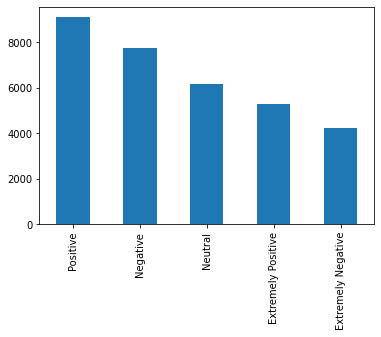

In [101]:
data['Sentiment'].value_counts().plot(kind = 'bar')

In [102]:
from nltk.corpus import stopwords 

In [103]:
# import string
# def remove_puncuation(string1):
#   translator = str.maketrans('','',string.punctuation)
#   return string1.translate(translator)

In [104]:
# data['Tokenize_OriginalTweet'] = data['OriginalTweet'].apply(remove_puncuation)

In [105]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [106]:
def convert_lower(text):
  return text.lower()

In [107]:
data['Tokenize_OriginalTweet'] = data['OriginalTweet'].apply(convert_lower)

In [108]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia: woolworths to give elde...
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,as news of the regionâs first confirmed covid...
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...
...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,yâall really shitting that much more at home?...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked by the number of #toronto superm...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,i never that weâd be in a situation &amp; wor...
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...


In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [111]:
def remove_stopword(text):
  words = [word for word in text.split() if word not in sw]
  return ' '.join(words)

In [112]:
data['Tokenize_OriginalTweet'] = data['Tokenize_OriginalTweet'].apply(remove_stopword)

In [113]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia: woolworths give elderly...
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news regionâs first confirmed covid-19 case c...
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights #covid_...
...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,yâall really shitting much home?? #covid19 #c...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked number #toronto supermarket empl...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,never weâd situation &amp; world going superm...
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...


In [114]:
#https://www.machinelearningplus.com/nlp/natural-language-processing-guide/
a = data['OriginalTweet'][5]

In [115]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [117]:
from nltk.stem.snowball import SnowballStemmer

In [118]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [119]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
lemmatizer = WordNetLemmatizer()
def text_preprocessing(text):
  text = remove_special(text)
  text = re.sub(r'(\s)https\w+', r'\1', text)

  text = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(text)

In [120]:
text_preprocessing(a)

'As news of the region first confirmed COVID19 case came out of Sullivan County last week people flocked to area store to purchase cleaning supply hand sanitizer food toilet paper and other good TimDodson report'

In [121]:
a

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [122]:
data['Tokenize_OriginalTweet'] = data['Tokenize_OriginalTweet'].apply(text_preprocessing)

In [123]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news region first confirmed covid19 case came ...
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insight covid19 ...
...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,yall really shitting much home covid19 coronav...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked number toronto supermarket emplo...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,never wed situation amp world going supermarke...
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilot offering stock supermarket shelf...


In [124]:
tifid = TfidfVectorizer(max_df = 0.9,min_df = 10, ngram_range=(1,2))
X = tifid.fit_transform(data['Tokenize_OriginalTweet'])

In [125]:
print(tifid.get_feature_names())

['00', '000', '10', '10 000', '10 day', '10 million', '10 people', '10 year', '100', '100 000', '100 crore', '100 people', '100 per', '1000', '10000', '100000', '100k', '101', '10am', '10downingstreet', '11', '12', '12 million', '12 month', '12 week', '120', '1200', '13', '130', '14', '14 day', '15', '15 minute', '150', '16', '17', '17 year', '18', '1800', '18002199739', '18002199739 speak', '18year', '18year low', '19', '19 case', '19 consumer', '19 coronavirus', '19 crisis', '19 impact', '19 lockdown', '19 outbreak', '19 pandemic', '19 panic', '19 people', '19 please', '19 price', '19 recent', '19 related', '19 response', '19 situation', '19 supermarket', '19 test', '19 testing', '19 update', '19 via', '19 virus', '1999', '19th', '19th assist', '1st', '1st responder', '1st time', '20', '20 per', '20 second', '20 year', '200', '200 ml', '2000', '2002', '2003', '2008', '2014', '2016', '2018', '2019', '2020', '2020 consumer', '2020 coronavirus', '2020 covid19', '2021', '21', '21 day', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [126]:
dictionary = tifid.vocabulary_.items()

In [127]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news region first confirmed covid19 case came ...
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insight covid19 ...


In [128]:


def frecuncy_word(word_dict):
  vocab = []
  counts = []
  for key, value in word_dict:
    vocab.append(key)
    counts.append(value)

  word_df = pd.Series(counts, index = vocab)
  word_df = word_df.sort_values(ascending=False)

  top_vocab = word_df.head(20)
  top_vocab.plot(kind = 'barh', figsize=(5,10))

  
  return top_vocab



zoom                 9175
zone                 9174
zombie apocalypse    9173
zombie               9172
zimbabwe             9171
zero                 9170
zealand              9169
yyc                  9168
yr                   9167
yoy                  9166
youve                9165
youtube              9164
youth                9163
yourselves           9162
yourself             9161
youre                9160
younger              9159
young                9158
youll                9157
youd                 9156
dtype: int64

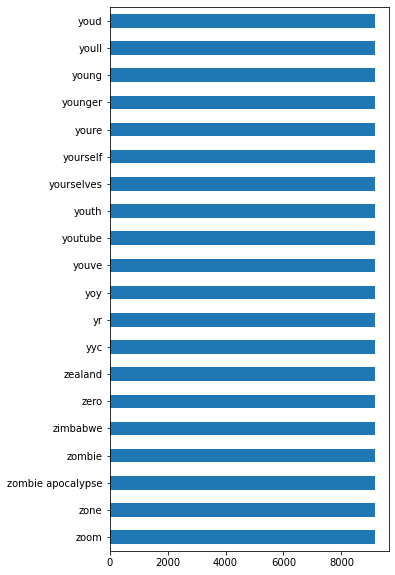

In [129]:
frecuncy_word(dictionary)

In [130]:
#positive_sentiment
postive = data[(data['Sentiment'] == 'Positive') | (data['Sentiment'] == 'Extremely Positive')]

In [131]:
tifid.fit_transform(postive['Tokenize_OriginalTweet'].values)
positive_dictionary = tifid.vocabulary_.items()

zero           4644
yr             4643
youve          4642
youtube        4641
yourself       4640
youre          4639
young          4638
youll          4637
you covid19    4636
you            4635
york           4634
yet            4633
yesterday      4632
yes            4631
year old       4630
year ago       4629
year           4628
yeah           4627
yall           4626
ya             4625
dtype: int64

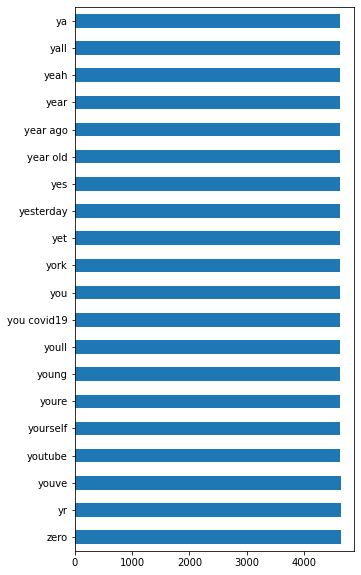

In [132]:
frecuncy_word(positive_dictionary)

In [133]:
negative = data[(data['Sentiment'] == 'Negative') | (data['Sentiment'] == 'Extremely Negative')]

In [134]:
negative

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
9,3808,48760,BHAVNAGARGUJRAT,16-03-2020,"For corona prevention,we should stop to buy th...",Negative,corona preventionwe stop buy thing cash use on...
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative,100 nation inficted covid 19 world must play f...
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative,10downingstreet grantshapps done ensure food e...
26,3825,48777,Ketchum Idaho,16-03-2020,In preparation for higher demand and a potenti...,Negative,preparation higher demand potential food short...
27,3826,48778,Everywhere You Are,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative,morning tested positive covid 19 feel ok sympt...
...,...,...,...,...,...,...,...
41131,44930,89882,Accra Ghana,14-04-2020,In every human affliction there are gainers a...,Negative,every human affliction gainer loser case covid...
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman s...,Extremely Negative,singaporean politician slammed woman snapped s...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,yall really shitting much home covid19 coronav...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked number toronto supermarket emplo...


In [135]:

tifid.fit_transform(negative['Tokenize_OriginalTweet'].values)

<12012x4022 sparse matrix of type '<class 'numpy.float64'>'
	with 207752 stored elements in Compressed Sparse Row format>

In [136]:
negative_dictionary = tifid.vocabulary_.items()

zone          4021
zombie        4020
zero          4019
yr            4018
youtube       4017
yourself      4016
youre         4015
young         4014
youll         4013
you           4012
york          4011
yo            4010
yet           4009
yesterday     4008
yes           4007
year old      4006
year          4005
yall          4004
ya            4003
wuhanvirus    4002
dtype: int64

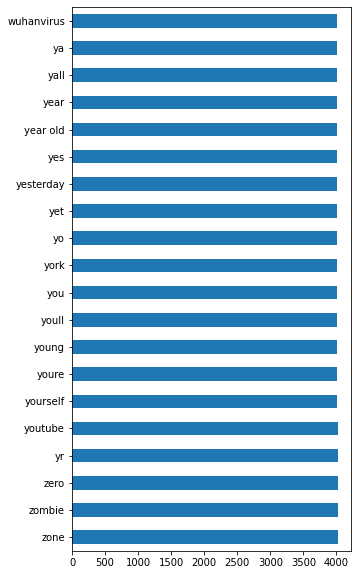

In [137]:
frecuncy_word(negative_dictionary)

In [138]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tokenize_OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
5,3804,48756,T 3631970882363649,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news region first confirmed covid19 case came ...
6,3805,48757,3592654178753267,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insight covid19 ...
...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,yall really shitting much home covid19 coronav...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,still shocked number toronto supermarket emplo...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,never wed situation amp world going supermarke...
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilot offering stock supermarket shelf...


In [140]:
sentiment = {'Extremely Negative':'Negative','Extremely Positive':'Positive'}
data['Sentiment'].replace(sentiment, inplace = True)

In [141]:
data['Sentiment'].value_counts()

Positive    14383
Negative    12012
Neutral      6172
Name: Sentiment, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split
tweet_train,tweet_test,sentiment_train,sentiment_test = train_test_split(data['Tokenize_OriginalTweet'],data['Sentiment'],test_size = 0.2, random_state=0)

In [143]:
tweet_train.shape

(26053,)

In [144]:
train_vectorizer = tifid.transform(tweet_train).toarray()
test_vectorizer = tifid.transform(tweet_test).toarray()

In [167]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_vectorizer,sentiment_train)

DecisionTreeClassifier()

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score
test_pred = dt.predict(test_vectorizer)

In [169]:
train_pred = dt.predict(train_vectorizer)

In [170]:
sentiment_test

1211     Negative
16394     Neutral
4298      Neutral
5059      Neutral
18799    Negative
           ...   
3533     Negative
39477     Neutral
39581    Positive
32480    Negative
14538    Positive
Name: Sentiment, Length: 6514, dtype: object

In [171]:
test_pred

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [172]:
cm = accuracy_score(sentiment_test,test_pred)

In [173]:
cm

0.6142155357691127

In [174]:
cm = accuracy_score(sentiment_train,train_pred)

In [175]:
cm

0.9994242505661536

In [152]:
cm = confusion_matrix(sentiment_test,test_pred)

In [153]:
cm

array([[1449,  346,  641],
       [ 275,  581,  326],
       [ 647,  317, 1932]])

In [176]:
from sklearn.metrics import f1_score

# Weighed F1 across all classes
f1_score(sentiment_test,test_pred, average="weighted")


0.615322851249892

In [186]:
from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted"
  )

custom_f1
make_scorer(f1_score, average='weighted')

make_scorer(f1_score, average=weighted)

In [215]:
from sklearn.model_selection import GridSearchCV
grid_values = {'max_depth':[100,150], 'min_samples_leaf':[2],'min_samples_split':[20],'max_leaf_nodes':[110,130]}
tuned_dt = GridSearchCV(dt, param_grid = grid_values, scoring = custom_f1, cv=5)
tuned_dt.fit(train_vectorizer,sentiment_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [100, 150], 'max_leaf_nodes': [110, 130],
                         'min_samples_leaf': [2], 'min_samples_split': [20]},
             scoring=make_scorer(f1_score, average=weighted))

In [216]:
train_pred = tuned_dt.predict(train_vectorizer)

In [217]:
test_pred = tuned_dt.predict(test_vectorizer)

In [218]:
print("Best: %f using %s" % (tuned_dt.best_score_, tuned_dt.best_params_))

Best: 0.614498 using {'max_depth': 100, 'max_leaf_nodes': 130, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [219]:
test_pred

array(['Positive', 'Negative', 'Neutral', ..., 'Positive', 'Negative',
       'Neutral'], dtype=object)

In [220]:
cm = accuracy_score(sentiment_test,test_pred)

In [221]:
cm

0.6066932760208781

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_vectorizer,sentiment_train)

RandomForestClassifier()

In [224]:
train_pred = rf.predict(train_vectorizer)
test_pred = rf.predict(test_vectorizer)

In [225]:
f1_score(sentiment_test,test_pred, average="weighted")
f1_score(sentiment_train,train_pred, average="weighted")

0.9994244308994102

In [226]:
f1_score(sentiment_test,test_pred, average="weighted")

0.7118282060677513

In [228]:
accuracy_score(sentiment_test,test_pred)

0.7124654590113602

In [234]:
from sklearn.model_selection import GridSearchCV
grid_values = {'max_depth':[200], 'min_samples_leaf':[2],'min_samples_split':[20],'max_leaf_nodes':[500,1000]}
tuned_rf = GridSearchCV(rf, param_grid = grid_values, scoring = custom_f1, cv=5)
tuned_rf.fit(train_vectorizer,sentiment_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [200], 'max_leaf_nodes': [500, 1000],
                         'min_samples_leaf': [2], 'min_samples_split': [20]},
             scoring=make_scorer(f1_score, average=weighted))

In [235]:
print("Best: %f using %s" % (tuned_rf.best_score_, tuned_rf.best_params_))

Best: 0.702093 using {'max_depth': 200, 'max_leaf_nodes': 1000, 'min_samples_leaf': 2, 'min_samples_split': 20}


## Try Topic modelling

In [244]:
# Parameters tuning using Grid Search
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(3,5))}
tifid = CountVectorizer(max_df = 0.9,min_df = 10)
X = tifid.fit_transform(data['Tokenize_OriginalTweet'])

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(X)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(X))

Best LDA model's params {'n_components': 3}
Best log likelihood Score for the LDA model -785922.5259388051
LDA model Perplexity on train data 1382.8496544169302


In [245]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [241]:
import pyLDAvis.sklearn

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [242]:
pyLDAvis.enable_notebook()

In [246]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, X ,tifid, mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
2     -1015.700562  1338.981201       1        1  40.578785
1      -387.996002  -373.316162       2        1  29.976507
0     -2184.745605   -60.565800       3        1  29.444708, topic_info=          Term         Freq        Total Category  logprob  loglift
3667     price  6902.000000  6902.000000  Default  30.0000  30.0000
1052  consumer  4275.000000  4275.000000  Default  29.0000  29.0000
2191   grocery  5222.000000  5222.000000  Default  28.0000  28.0000
4623     store  6343.000000  6343.000000  Default  27.0000  27.0000
3308    online  2762.000000  2762.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2279    health   539.740360   864.467294   Topic3  -5.6537   0.7516
1974      food   931.146060  5580.038623   Topic3  -5.1084  -0.5679
4891      time   654.310520  2442.817329   Topic3  -5.4612  -0.0947
1364  delivery   518.514533  1190.263825   Topic3  -5.6938   0.3917
3701   product   493.840637   871.421435   Topic3  -5.7426   0.6547

[244 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
26        1  0.254427       19
26        2  0.269092       19
26        3  0.476593       19
258       1  0.995907  alcohol
258       2  0.004446  alcohol
...     ...       ...      ...
5364      2  0.597669    world
5364      3  0.247401    world
5391      1  0.177337     year
5391      2  0.768460     year
5391      3  0.053897     year

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])